In [1]:
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np


import sys
sys.path.append("../../")
from ratata.inference.video_inference import VideoInferenceYolo

c:\Users\0000401658\miniconda3\envs\test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_path = "../../models/yolo/yolo11m-seg.pt"
image_path = "../../data/test/000000004134.jpg"
target_size = (384, 216)
device = "cuda:0"
model_path_tie = "../../models/yolo/yolo11m-seg.pt"
matt=True

In [3]:
video_inference = VideoInferenceYolo(model_path, target_size, device=device, 
                                     model_path_tie=model_path_tie, matt=matt)

In [4]:
image = cv2.imread(image_path)

In [5]:
start_time = time.time()
binary_mask, iou, trimap = video_inference.inference_frame(image)
elapsed_time = time.time() - start_time


print(f"shape: {binary_mask.shape}")
elapsed_time_ms = elapsed_time * 1000
print(f"iou: {iou}")
print(f"Elapsed time: {elapsed_time_ms:.2f} ms")


0: 448x640 3 persons, 79.1ms
Speed: 0.0ms preprocess, 79.1ms inference, 83.3ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 tie, 8.4ms
Speed: 2.0ms preprocess, 8.4ms inference, 4.2ms postprocess per image at shape (1, 3, 448, 640)
0
shape: (216, 384)
iou: 1
Elapsed time: 1049.34 ms


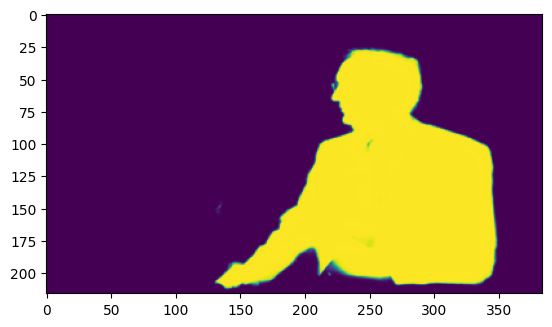

In [6]:
plt.imshow(binary_mask)

255


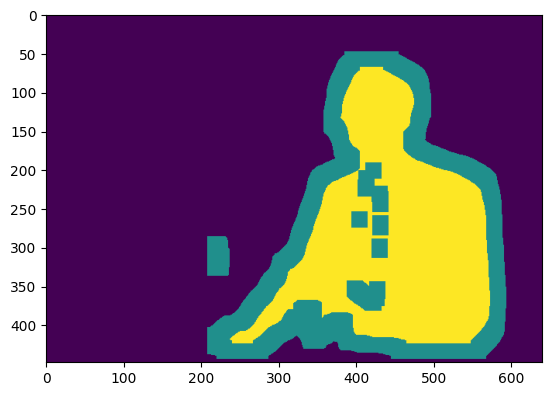

In [7]:
plt.imshow(trimap)
print(np.max(trimap))